

Bitcoin price prediction with RNN and different attention mechanisms

In [2]:
# !pip -q install tensorflow==2.8 > log
# !apt -q install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2 >> log
!pip -q install -U tfds-nightly tensorflow_addons tensorflow >> log

In [3]:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, RNN, LSTM, TimeDistributed
from keras import backend as K
from keras.layers import Layer

class BahdanauAttention(Layer):
    """
    Implementation of the Bahdanau (additive) attention mechanism.

    Attributes:
        kernel_init (tf.keras.initializers.Initializer): Initializer for the
            kernel weights matrix.Default is Glorot uniform initializer
            with a seed of 0.

    Methods:
        call(values, query): Computes the context vector and attention weights.

    Args:
        units (int): The dimensionality of the output space for the dense
            layers within the attention mechanism.

    Usage:
        The `BahdanauAttention` layer is typically used with recurrent
            like LSTM or GRU. The hidden states from one LSTM are provided as
            `values`, while the last hidden state from another LSTM
            is provided as `query`.

    Example:
        ```python
        attention = BahdanauAttention(units=128)
        context_vector, attention_weights = attention(
            lstm_hidden_states, last_hidden_state
        )
        ```

    """

    kernel_init = tf.keras.initializers.GlorotUniform(seed=7)  # Should have seeded better from the start!

    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = Dense(units, kernel_initializer=BahdanauAttention.kernel_init)
        self.W2 = Dense(units, kernel_initializer=BahdanauAttention.kernel_init)
        self.V = Dense(1, kernel_initializer=BahdanauAttention.kernel_init)

    def call(self, values, query):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Using proability function hardmax

In [4]:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, RNN, LSTM, TimeDistributed
from keras import backend as K
from keras.layers import Layer

class BahdanauAttentionProbability(Layer):



    kernel_init = tf.keras.initializers.GlorotUniform(seed=7)  # Should have seeded better from the start!

    def __init__(self, units):
        super(BahdanauAttentionProbability, self).__init__()
        self.W1 = Dense(units, kernel_initializer=BahdanauAttentionProbability.kernel_init)
        self.W2 = Dense(units, kernel_initializer=BahdanauAttentionProbability.kernel_init)
        self.V = Dense(1, kernel_initializer=BahdanauAttentionProbability.kernel_init)

    def call(self, values, query):
      hidden_with_time_axis = tf.expand_dims(query, 1)
      score = self.V(tf.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
      attention_weights = tf.cast(tf.math.argmax(score, axis=1), dtype=tf.float32)
      context_vector = attention_weights * values
      context_vector = tf.reduce_sum(context_vector, axis=1)



      return context_vector, attention_weights

Attention mechanism with sigmoid function

In [5]:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, RNN, LSTM, TimeDistributed
from keras import backend as K
from keras.layers import Layer

class BahdanauAttentionModified(Layer):
    """
    Implementation of the Bahdanau (additive) attention mechanism.

    Attributes:
        kernel_init (tf.keras.initializers.Initializer): Initializer for the
            kernel weights matrix.Default is Glorot uniform initializer
            with a seed of 0.

    Methods:
        call(values, query): Computes the context vector and attention weights.

    Args:
        units (int): The dimensionality of the output space for the dense
            layers within the attention mechanism.

    Usage:
        The `BahdanauAttention` layer is typically used with recurrent
            like LSTM or GRU. The hidden states from one LSTM are provided as
            `values`, while the last hidden state from another LSTM
            is provided as `query`.

    Example:
        ```python
        attention = BahdanauAttention(units=128)
        context_vector, attention_weights = attention(
            lstm_hidden_states, last_hidden_state
        )
        ```

    """

    kernel_init = tf.keras.initializers.GlorotUniform(seed=7)  # Should have seeded better from the start!

    def __init__(self, units):
        super(BahdanauAttentionModified, self).__init__()
        self.W1 = Dense(units, kernel_initializer=BahdanauAttentionModified.kernel_init)
        self.W2 = Dense(units, kernel_initializer=BahdanauAttentionModified.kernel_init)
        self.V = Dense(1, kernel_initializer=BahdanauAttentionModified.kernel_init)

    def call(self, values, query):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.sigmoid(self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


In [6]:
sample=pd.read_csv('tXY.csv', index_col='id');
train = sample[0:400000];
test= sample[400000:500000];


I tried different techniques like adding a lag of differing timesteps to allow for some trend data in addition to the timestep features themselves. I tried one time step, 390 timesteps (assuming that each timestep is a minute and there are 390 minutes in a trading day), and 390*5 timesteps to engineer weeklong trends. However, this didn't help as much as changing the timesteps to reflect the percentage change over the previous timestep. One motivation to altering the input to percentage change was because of the correlation grading metric. Correlation has a lot of emphasis if two vectors are moving in the same positive or negative direction. By trying to predict direction change instead of overall price shape this allowed for much better Pearson correlation and overall a more performant model, though it introduced additional steps to recover the "real" prices.

In [7]:
tXY1 = train.copy()
tXY = train.pct_change().fillna(0)

taX.shape=(K,Nx,p)=(50, 20000, 7); taY=(K,Ny)=(50, 100000)


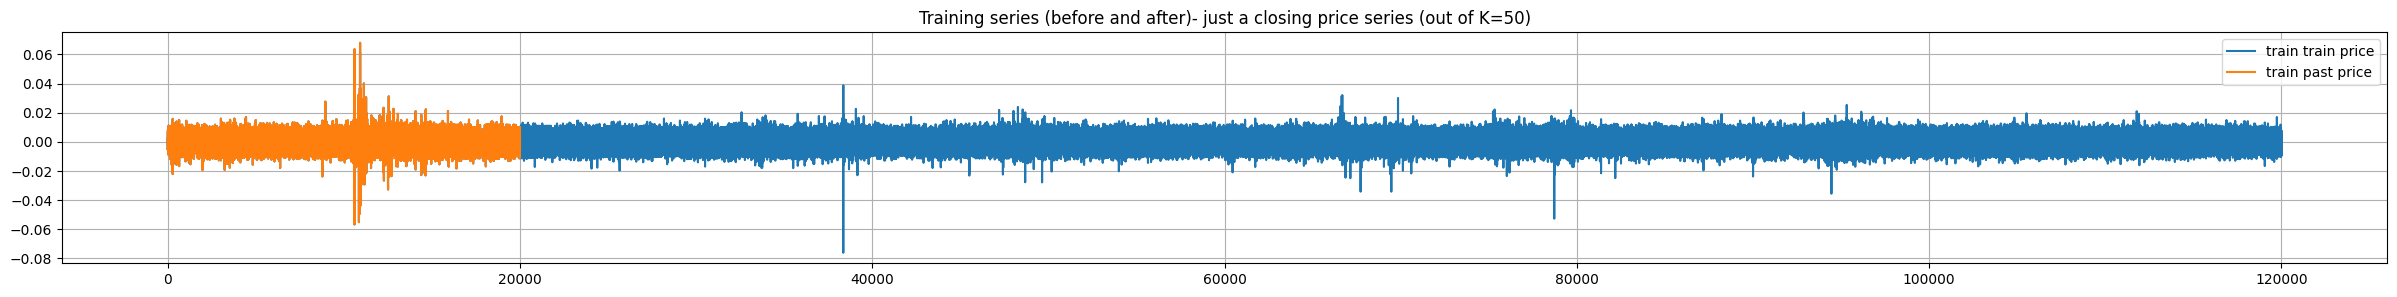

In [8]:
K, (N, p), Nx, Ny = 50, tXY.shape, 20000, len(test)  # samples, dataset dim, train set size, forecast set size
LtX, LtY = [], []
for i in range(N-Ny-K, N-Ny):                     # populate K samples with past X series and future Y series
  LtX.append(tXY.iloc[(i-Nx):i, :].values)        # X: historical 7Dim observations for Nx steps behind
  LtY.append(tXY.loc[i:(i+Ny-1),'Close'].values)  # Y: future closing prices for Ny steps ahead
taX, taY = np.array(LtX), np.array(LtY)           # training arrays past input X and future output Y
print(f'taX.shape=(K,Nx,p)={taX.shape}; taY=(K,Ny)={taY.shape}')  # convert to 3-tensors


df = pd.DataFrame(np.r_[taX[0,:,4], taY[0,:]], columns=['train train price'])
ax = df.plot(figsize=(30,3), title=f'Training series (before and after)- just a closing price series (out of K={K})');
pd.DataFrame(taX[0,:,4], columns=['train past price']).plot(grid=True, ax=ax);

Kwiatkowski-Phillips-Schmidt-Shin
Tests whether a time series is trend stationary or not.

In [9]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = tXY.Close[1:Nx]
stat, prob, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, prob))
if prob > 0.05:
 print('Probably Stationary')
else:
 print('Probably not Stationary')


stat=0.193, p=0.100
Probably Stationary


<ipython-input-9-35f2e4a249cb>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, prob, lags, crit = kpss(data)


The Durbin Watson test is a statistical test that is used to test for the presence of autocorrelation in the residuals of a regression model. The test statistic is a measure of the correlation between the residuals and the previous values of the residuals. A value of 2 indicates that there is no autocorrelation in the residuals. A value less than 2 indicates that there is positive autocorrelation in the residuals. A value greater than 2 indicates that there is negative autocorrelation in the residuals.



In [10]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(tXY["Open"][100:100+Nx])

In [11]:
print(dw)

2.8581092111133706


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, GRU, Input, BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, LayerNormalization
from tensorflow.keras.models import Model


tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

input_shape = (None, p)

# Create the input layer
input_layer = Input(shape=input_shape, name='input_layer')

# Add Conv1D layer, kernel_size of 5 proved to do well, more or less tended to decrease performance
conv_layer = Conv1D(filters=200, kernel_size=5, activation='relu', name='conv_layer', kernel_initializer=Init)(input_layer)

# Feed Conv1D results into recurrent layers
lstm_layer1 = LSTM(units=200, return_sequences=True, kernel_initializer=Init, recurrent_initializer=Init, name='LSTM1')(conv_layer)
dropout1 = Dropout(0.2, name='dropout1', seed=42)(lstm_layer1)

# Attention
attention = BahdanauAttention(200)
context_vector, attention_weights = attention(lstm_layer1, lstm_layer1[:,-1,:])
dropout2 = Dropout(0.2, name='dropout2', seed=42)(context_vector)

# Add the output layer, tanh to keep the output bounded to represent percentage change
output_layer = Dense(activation='tanh', units=Ny, kernel_initializer=Init, name='output')(dropout2)

In [13]:
# Create the model
model1 = Model(inputs=input_layer, outputs=output_layer, name='RNN_model1')

model1.summary()

# Course adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.1, decay_steps=10000, decay_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=lrs, amsgrad=True)

# Mean absolute error to be robust against major swings
model1.compile(loss="mean_absolute_error", optimizer=opt,metrics=['cosine_similarity'])
history = model1.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.2)

# Fine adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=10000, decay_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=lrs, amsgrad=True)
model1.compile(loss="mean_absolute_error", optimizer=opt, metrics=['cosine_similarity'])
history = model1.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.1)

Model: "RNN_model1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, None, 7)]            0         []                            
                                                                                                  
 conv_layer (Conv1D)         (None, None, 200)            7200      ['input_layer[0][0]']         
                                                                                                  
 LSTM1 (LSTM)                (None, None, 200)            320800    ['conv_layer[0][0]']          
                                                                                                  
 tf.__operators__.getitem (  (None, 200)                  0         ['LSTM1[0][0]']               
 SlicingOpLambda)                                                                        

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.1804 - cosine_similarity: 0.0150

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 31s 2s/step - loss: 0.1804 - cosine_similarity: 0.0150 - val_loss: 0.2967 - val_cosine_similarity: 5.4698e-04
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.6447 - cosine_similarity: 3.8183e-04 - val_loss: 0.9093 - val_cosine_similarity: -3.0824e-04
Epoch 3/10
3/3 [==============================] - 3s 947ms/step - loss: 0.9016 - cosine_similarity: 0.0047 - val_loss: 0.8846 - val_cosine_similarity: -2.2538e-04
Epoch 4/10
3/3 [==============================] - 2s 791ms/step - loss: 0.8805 - cosine_similarity: 0.0044 - val_loss: 0.8602 - val_cosine_similarity: -3.0903e-04
Epoch 5/10
3/3 [==

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.5547 - cosine_similarity: 0.0022    

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 7s 1s/step - loss: 0.5547 - cosine_similarity: 0.0022 - val_loss: 0.4165 - val_cosine_similarity: -6.6504e-04
Epoch 2/10
3/3 [==============================] - 2s 808ms/step - loss: 0.5086 - cosine_similarity: 0.0012 - val_loss: 0.3708 - val_cosine_similarity: -0.0013
Epoch 3/10
3/3 [==============================] - 2s 771ms/step - loss: 0.4937 - cosine_similarity: 0.0024 - val_loss: 0.3518 - val_cosine_similarity: -0.0016
Epoch 4/10
3/3 [==============================] - 2s 825ms/step - loss: 0.4563 - cosine_similarity: -5.0497e-04 - val_loss: 0.3313 - val_cosine_similarity: -0.0016
Epoch 5/10
3/3 [==========

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, GRU, Input, BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, LayerNormalization
from tensorflow.keras.models import Model



tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

input_shape = (None, p)

# Create the input layer
input_layer = Input(shape=input_shape, name='input_layer')
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

input_shape = (None, p)

# Create the input layer
input_layer = Input(shape=input_shape, name='input_layer')


# Add Conv1D layer, kernel_size of 5 proved to do well, more or less tended to decrease performance
conv_layer = Conv1D(filters=200, kernel_size=5, activation='selu', name='conv_layer', kernel_initializer=Init)(input_layer)

# Feed Conv1D results into recurrent layers
lstm_layer1 = LSTM(units=200, return_sequences=True, kernel_initializer=Init, recurrent_initializer=Init, name='LSTM1')(conv_layer)
dropout1 = Dropout(0.2, name='dropout1', seed=42)(lstm_layer1)

# Attention
attention = BahdanauAttentionModified(200)
context_vector, attention_weights = attention(lstm_layer1, lstm_layer1[:,-1,:])
dropout2 = Dropout(0.2, name='dropout2', seed=42)(context_vector)

# Add the output layer, tanh to keep the output bounded to represent percentage change
output_layer = Dense(activation='selu', units=Ny, kernel_initializer=Init, name='output')(dropout2)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer, name='RNN_model2')

model2.summary()

# Course adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.1, decay_steps=10000, decay_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=lrs)

# Mean absolute error to be robust against major swings
model2.compile(loss="mean_absolute_error", optimizer=opt, metrics=['cosine_similarity'])
history = model2.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.2)

# Fine adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=10000, decay_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=lrs, amsgrad=True)
model2.compile(loss="mean_absolute_error", optimizer=opt, metrics=['cosine_similarity'])
history = model2.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.1)

Model: "RNN_model2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, None, 7)]            0         []                            
                                                                                                  
 conv_layer (Conv1D)         (None, None, 200)            7200      ['input_layer[0][0]']         
                                                                                                  
 LSTM1 (LSTM)                (None, None, 200)            320800    ['conv_layer[0][0]']          
                                                                                                  
 tf.__operators__.getitem_1  (None, 200)                  0         ['LSTM1[0][0]']               
  (SlicingOpLambda)                                                                      

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.2384 - cosine_similarity: -0.0105

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 7s 1s/step - loss: 0.2384 - cosine_similarity: -0.0105 - val_loss: 1.3572 - val_cosine_similarity: -5.6906e-04
Epoch 2/10
3/3 [==============================] - 2s 831ms/step - loss: 1.1641 - cosine_similarity: 3.5080e-04 - val_loss: 1.1115 - val_cosine_similarity: -0.0035
Epoch 3/10
3/3 [==============================] - 2s 825ms/step - loss: 1.0169 - cosine_similarity: -0.0016 - val_loss: 0.7448 - val_cosine_similarity: 0.0021
Epoch 4/10
3/3 [==============================] - 2s 763ms/step - loss: 0.6038 - cosine_similarity: -0.0027 - val_loss: 0.6282 - val_cosine_similarity: -0.0021
Epoch 5/10
3/3 [=========

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.2122 - cosine_similarity: -0.0023

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 7s 1s/step - loss: 0.2122 - cosine_similarity: -0.0023 - val_loss: 0.0928 - val_cosine_similarity: -1.1333e-04
Epoch 2/10
3/3 [==============================] - 2s 767ms/step - loss: 0.1571 - cosine_similarity: -2.3838e-04 - val_loss: 0.0860 - val_cosine_similarity: -4.3826e-04
Epoch 3/10
3/3 [==============================] - 2s 772ms/step - loss: 0.1417 - cosine_similarity: 0.0021 - val_loss: 0.0660 - val_cosine_similarity: 5.7156e-04
Epoch 4/10
3/3 [==============================] - 2s 808ms/step - loss: 0.1204 - cosine_similarity: -0.0021 - val_loss: 0.0704 - val_cosine_similarity: 6.1998e-04
Epoch 5/10
3/3

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, GRU, Input, BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, LayerNormalization
from tensorflow.keras.models import Model



tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

input_shape = (None, p)

# Create the input layer
input_layer = Input(shape=input_shape, name='input_layer')
tf.random.set_seed(0)   # always seed your experiments
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

input_shape = (None, p)

# Create the input layer
input_layer = Input(shape=input_shape, name='input_layer')

# Add Conv1D layer, kernel_size of 5 proved to do well, more or less tended to decrease performance
conv_layer = Conv1D(filters=200, kernel_size=5, activation='relu', name='conv_layer', kernel_initializer=Init)(input_layer)

# Feed Conv1D results into recurrent layers
lstm_layer1 = LSTM(units=200, return_sequences=True, kernel_initializer=Init, recurrent_initializer=Init, name='LSTM1')(conv_layer)
dropout1 = Dropout(0.2, name='dropout1', seed=42)(lstm_layer1)

lstm_layer2 = LSTM(units=200, return_sequences=False, kernel_initializer=Init, recurrent_initializer=Init, name='LSTM2')(dropout1)
dropout2 = Dropout(0.2, name='dropout2', seed=42)(lstm_layer2)

# Add the output layer, tanh to keep the output bounded to represent percentage change
output_layer = Dense(activation='tanh', units=Ny, kernel_initializer=Init, name='output')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer, name='RNN_model')

model.summary()

# Course adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.1, decay_steps=10000, decay_rate=0.01)
opt = keras.optimizers.Adam(learning_rate=lrs, amsgrad=True)

# Mean absolute error to be robust against major swings
model.compile(loss="mean_absolute_error", optimizer=opt, metrics=['cosine_similarity'])
history = model.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.2)

# Fine adjustment
lrs = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=10000, decay_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=lrs, amsgrad=True)
model.compile(loss="mean_absolute_error", optimizer=opt, metrics=['cosine_similarity'])
history = model.fit(taX, taY, epochs=10, batch_size=16, validation_split=0.1)



Model: "RNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, None, 7)]         0         
                                                                 
 conv_layer (Conv1D)         (None, None, 200)         7200      
                                                                 
 LSTM1 (LSTM)                (None, None, 200)         320800    
                                                                 
 dropout1 (Dropout)          (None, None, 200)         0         
                                                                 
 LSTM2 (LSTM)                (None, 200)               320800    
                                                                 
 dropout2 (Dropout)          (None, 200)               0         
                                                                 
 output (Dense)              (None, 100000)            20

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.0649 - cosine_similarity: -0.0053

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 10s 2s/step - loss: 0.0649 - cosine_similarity: -0.0053 - val_loss: 0.9702 - val_cosine_similarity: -5.3239e-04
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.9739 - cosine_similarity: -0.0035 - val_loss: 0.9828 - val_cosine_similarity: -5.2593e-04
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.9809 - cosine_similarity: -0.0035 - val_loss: 0.9788 - val_cosine_similarity: -4.0765e-04
Epoch 4/10
3/3 [==============================] - 6s 1s/step - loss: 0.9792 - cosine_similarity: -0.0030 - val_loss: 0.9783 - val_cosine_similarity: -4.7758e-04
Epoch 5/10
3/3 [=======

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 0.9548 - cosine_similarity: -0.0023

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 9s 2s/step - loss: 0.9548 - cosine_similarity: -0.0023 - val_loss: 0.9238 - val_cosine_similarity: -0.0015
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.9461 - cosine_similarity: -0.0041 - val_loss: 0.9041 - val_cosine_similarity: -0.0013
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.9394 - cosine_similarity: -0.0045 - val_loss: 0.8930 - val_cosine_similarity: -0.0011
Epoch 4/10
3/3 [==============================] - 4s 2s/step - loss: 0.9402 - cosine_similarity: -0.0014 - val_loss: 0.8929 - val_cosine_similarity: -8.7474e-04
Epoch 5/10
3/3 [====================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


tX_recent.shape=(Nx,p)=(20000, 7)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 746ms/step


<ipython-input-16-74310d881d23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ClosePredict'] = fY2.cumprod().to_numpy().flatten()


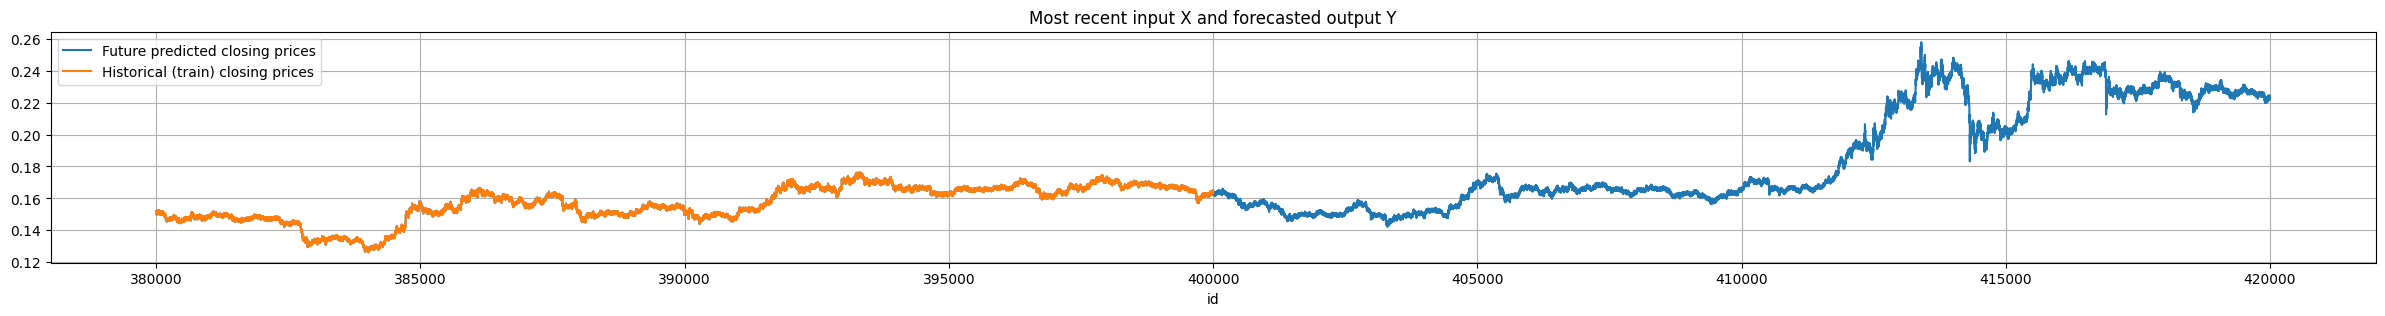

In [16]:
tX_recent = tXY.iloc[-Nx:,:]  # most recent history of the coin as percentage changes
tX_recent2 = tXY1.iloc[-Nx:,:]  # most recent history of the coin in original form
print(f'tX_recent.shape=(Nx,p)={tX_recent.shape}')

fY = model1.predict(tX_recent.values[np.newaxis,...]).flatten()  # the model expects a 3-tensor (K=1,Nx,p)
# Restore percentages and clip to previously observed ranges
fY2 = pd.DataFrame(fY+1).clip(lower=0.99, upper=1.01)
# Replace first array with last known close price to restore actual price
fY2.iloc[0] *= tX_recent2.iloc[-1].Close
# Restore price fully with a cumulative product
test['ClosePredict'] = fY2.cumprod().to_numpy().flatten()

# Plot
ax = pd.concat([tX_recent2.Close, test.Close[:Nx]]).plot(figsize=(30,3), title='Most recent input X and forecasted output Y');
tX_recent2.Close.plot(ax=ax, grid=True);
ax.legend(["Future predicted closing prices", "Historical (train) closing prices"]);

Prediction sattistics model 1 with tahn

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

# Calculate the MAPE score
mape_score = mean_absolute_percentage_error(test['Close'][:Nx] , test['ClosePredict'][:Nx] )
print("MAPE scores "+str(mape_score))
mapescore = mean_absolute_percentage_error(test['Close'][:Nx] , test['ClosePredict'][:Nx] )
msescore = mean_squared_error(test['Close'][:Nx] , test['ClosePredict'][:Nx] )
print("MSE scores "+str(msescore))
r2scores=r2_score(test['Close'][:Nx] , test['ClosePredict'][:Nx] )
print("R2 scores "+str(r2scores))

MAPE scores 0.7351404609639214
MSE scores 0.02287599927008982
R2 scores -20.470206627516447


Prediction sattistics model 2 with sigmoid

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


tX_recent.shape=(Nx,p)=(20000, 7)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 701ms/step


<ipython-input-18-28e8e63d78c7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ClosePredict1'] = fY2.cumprod().to_numpy().flatten()


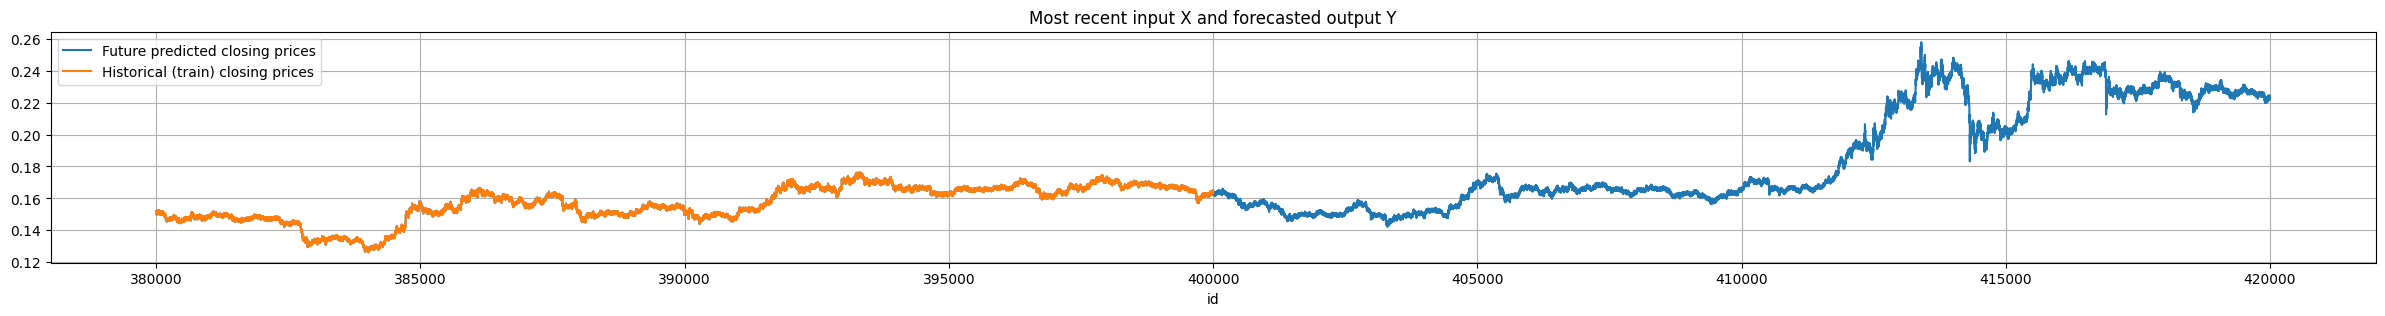

In [18]:
tX_recent = tXY.iloc[-Nx:,:]  # most recent history of the coin as percentage changes
tX_recent2 = tXY1.iloc[-Nx:,:]  # most recent history of the coin in original form
print(f'tX_recent.shape=(Nx,p)={tX_recent.shape}')

fY = model2.predict(tX_recent.values[np.newaxis,...]).flatten()  # the model expects a 3-tensor (K=1,Nx,p)
# Restore percentages and clip to previously observed ranges
fY2 = pd.DataFrame(fY+1).clip(lower=0.99, upper=1.01)
# Replace first array with last known close price to restore actual price
fY2.iloc[0] *= tX_recent2.iloc[-1].Close
# Restore price fully with a cumulative product
test['ClosePredict1'] = fY2.cumprod().to_numpy().flatten()

# Plot
ax = pd.concat([tX_recent2.Close, test.Close[:Nx]]).plot(figsize=(30,3), title='Most recent input X and forecasted output Y');
tX_recent2.Close.plot(ax=ax, grid=True);
ax.legend(["Future predicted closing prices", "Historical (train) closing prices"]);

In [19]:

# Calculate the MAPE score
mape_score = mean_absolute_percentage_error(test['Close'][:Nx] , test['ClosePredict1'][:Nx] )
print("MAPE scores "+str(mape_score))
msescores = mean_squared_error(test['Close'][:Nx] , test['ClosePredict1'][:Nx] )
print("MSE scores ")
print(str(msescores))



MAPE scores 0.9912802670664765
MSE scores 
0.03528259648458646


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


tX_recent.shape=(Nx,p)=(20000, 7)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 1s/step


<ipython-input-20-2fd1e2c95035>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ClosePredict2'] = fY2.cumprod().to_numpy().flatten()


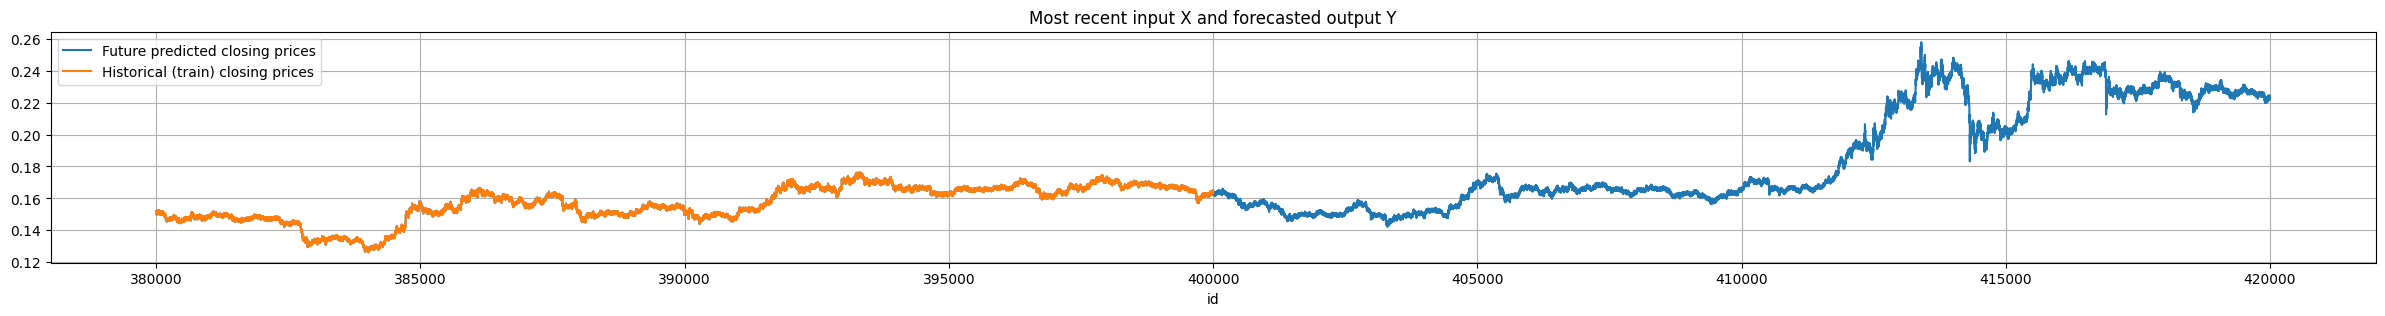

In [20]:
tX_recent = tXY.iloc[-Nx:,:]  # most recent history of the coin as percentage changes
tX_recent2 = tXY1.iloc[-Nx:,:]  # most recent history of the coin in original form
print(f'tX_recent.shape=(Nx,p)={tX_recent.shape}')

fY = model.predict(tX_recent.values[np.newaxis,...]).flatten()  # the model expects a 3-tensor (K=1,Nx,p)
# Restore percentages and clip to previously observed ranges
fY2 = pd.DataFrame(fY+1).clip(lower=0.99, upper=1.01)
# Replace first array with last known close price to restore actual price
fY2.iloc[0] *= tX_recent2.iloc[-1].Close
# Restore price fully with a cumulative product
test['ClosePredict2'] = fY2.cumprod().to_numpy().flatten()

# Plot
ax = pd.concat([tX_recent2.Close, test.Close[:Nx]]).plot(figsize=(30,3), title='Most recent input X and forecasted output Y');
tX_recent2.Close.plot(ax=ax, grid=True);
ax.legend(["Future predicted closing prices", "Historical (train) closing prices"]);

Model without attention mechanism

In [21]:
# Calculate the MAPE score
mapescore = mean_absolute_percentage_error(test['Close'][:Nx] , test['ClosePredict2'][:Nx] )
print("MAPE scores "+str(mapescore))
msescore = mean_squared_error(test['Close'][:Nx] , test['ClosePredict2'][:Nx] )
print("MSE scores "+str(msescore))



MAPE scores 0.3867878775517759
MSE scores 0.007281516812996742


The Black-Scholes call option formula is calculated by multiplying the stock price by the cumulative standard normal probability distribution function.

References
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/


In [35]:
import numpy as np
import matplotlib.pyplot as plt
#Monte Carlo based on Option pricing theory: Black_scholes Brownian motion
def monte_carlo_simulation(initial_price, drift, volatility, num_simulations, num_periods):
    dt = 1  # time step
    simulations = np.zeros((num_simulations, num_periods ))

    for i in range(num_simulations):
        price_path = [initial_price]

        for t in range(1, num_periods):
            z = np.random.normal(0, 1)  # random normal distribution for  returns
            return_ = drift * dt + volatility * np.sqrt(dt) * z
            price = price_path[-1] * np.exp(return_)
            price_path.append(price)

        simulations[i, :] = price_path

    return simulations

# Parameters

close_0=tX_recent2.iloc[-1].Close
initial_price = close_0
drift = 0.0001  # drift
volatility = 0.024  #  volatility
num_simulations = 100
num_periods = len(test)

# Run Monte Carlo simulation
simulations = monte_carlo_simulation(initial_price, drift, volatility, num_simulations, num_periods)


In [31]:
simulations.shape

(100, 100001)

In [37]:
from scipy.stats import ttest_rel

#Assuming you have three arrays: actual_prices, arima_predictions, random_predictions
# Calculate Mean Squared Errors
actual_prices=test['Close']
llm_predictions=test['ClosePredict2']
mse_actual = ((actual_prices - actual_prices.mean())**2).mean()

mse_random = ((simulations[1,:] - actual_prices)**2).mean()
mse_llm = ((llm_predictions- actual_prices)**2).mean()
# Perform a paired t-test
#Random
t_statistic, p_value = ttest_rel((llm_predictions - actual_prices)**2, (simulations[1,:]  - actual_prices)**2)

# Print results
print(f'MSE LLM: {mse_llm}')
print(f'MSE Random: {mse_random}')
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check if the p-value is less than your significance level (e.g., 0.05) to reject the null hypothesis
#Random
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference.')
else:
    print("p_value="+str(p_value))
    print('Fail to reject the null hypothesis. There is no significant difference with random prediction')

MSE LLM: 0.7905931559786086
MSE Random: 84323833844.98534
T-Statistic: -71.67268790807819
P-Value: 0.0
Reject the null hypothesis. There is a significant difference.


Arima model

ADF Statistic: -1.6779281014976881
p-value: 0.44251895363481575
Critical Values: {'1%': -3.4437112724287253, '5%': -2.8674324209387345, '10%': -2.569908433637385}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:               ARIMA(50, 1, 50)   Log Likelihood                5274.988
Date:                Mon, 11 Dec 2023   AIC                         -10347.977
Time:                        23:01:24   BIC                          -9857.687
Sample:                             0   HQIC                        -10161.150
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4509      0.051     -8.905      0.000      -0.550      -0.352
ar.L2         -0.5974      0.103     -5.778      0.000      -0.800      -0.395
ar.L3         -0.3248      0.087     -3.752      0.0

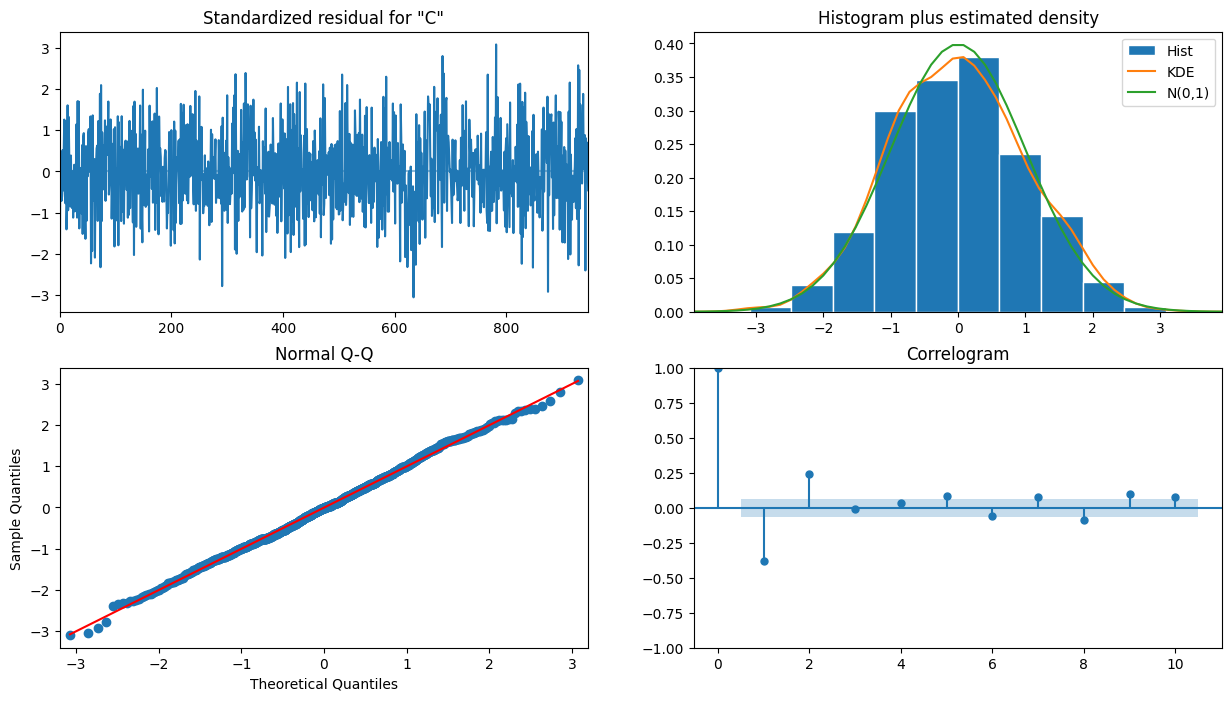

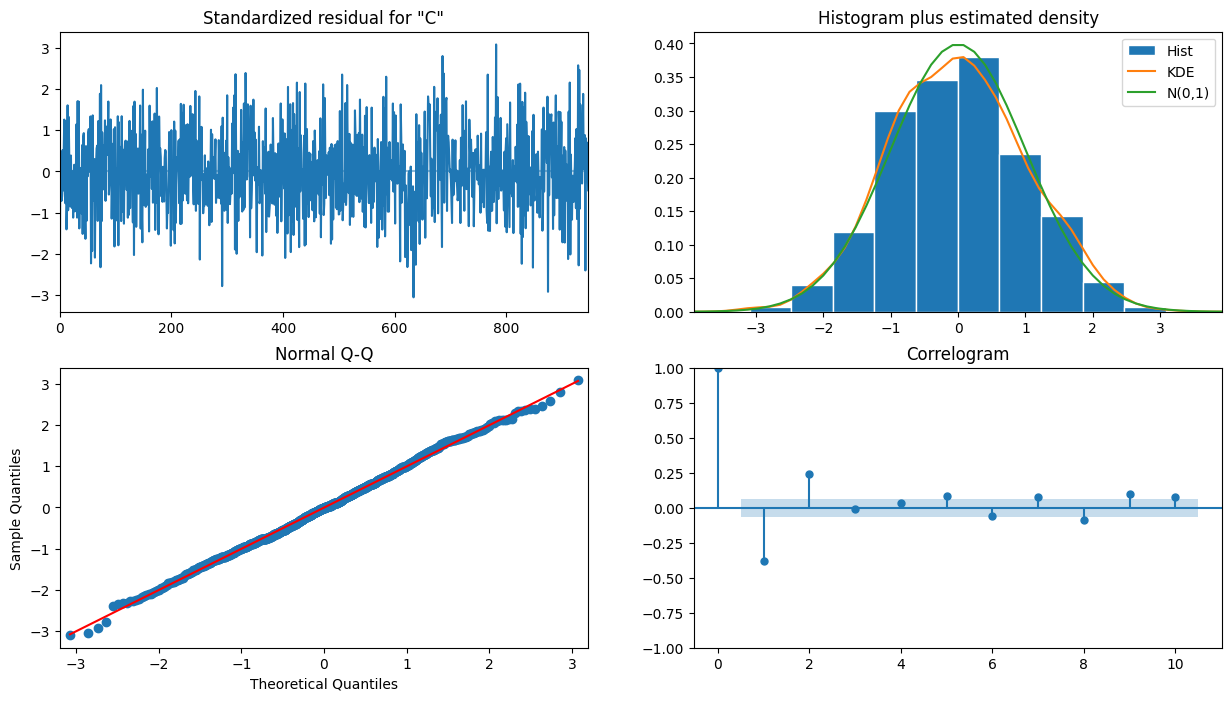

AttributeError: ignored

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(train['Close'][1:500])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If the p-value is greater than a significance level (e.g., 0.05), the time series is not stationary.
# You may need to difference the series to make it stationary.



# Choose the order of the ARIMA model based on ACF and PACF plots

# Fit the ARIMA model (d=1)
d=1
q=50
p=50
order = (p, d, q)  # replace p, d, and q with the chosen orders
model = ARIMA(train['Close'][399000:400000], order=order,enforce_stationarity=False)
arimaresult= model.fit()

# Print the model summary
print(arimaresult.summary())

# Plot the residuals
arimaresult.plot_diagnostics(figsize=(15, 8))
plt.show()


# forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]
# forecast_values = forecast.predicted_mean.values
# plt.plot(df['value'], label='Observed')
# plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
# plt.legend()
# plt.show()

In [46]:
# Forecast future values
forecast_steps = len(test)  #number of steps you want to forecast
arimaforecast =arimaresult.get_forecast(steps=forecast_steps).predicted_mean

AttributeError: ignored

In [ ]:
from scipy.stats import ttest_rel

#Assuming you have three arrays: actual_prices, arima_predictions, random_predictions
# Calculate Mean Squared Errors
actual_prices=test['Close']
llm_predictions=test['ClosePredict2']
mse_actual = ((actual_prices - actual_prices.mean())**2).mean()

mse_arima= ((arimaforecast - actual_prices)**2).mean()
mse_llm = ((llm_predictions- actual_prices)**2).mean()
# Perform a paired t-test
#Random
t_statistic, p_value = ttest_rel((llm_predictions - actual_prices)**2, (arimaforecast  - actual_prices)**2)

# Print results
print(f'MSE LLM: {mse_llm}')
print(f'MSE Arima: {mse_arima}')
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check if the p-value is less than your significance level (e.g., 0.05) to reject the null hypothesis
#Random
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference.')
else:
    print("p_value="+str(p_value))
    print('Fail to reject the null hypothesis. There is no significant difference with random prediction')